In [1]:
def Allergy_(list1):
    allergy=[]
    ingredient=' '
    for temp in list1:
        if '난류' in temp and '난류' not in ingredient:
            ingredient += '난류 '
        if '우유' in temp and '우유' not in ingredient:
            ingredient += '우유 '
        if '메밀' in temp and '메밀' not in ingredient:
            ingredient += '메밀 '
        if '땅콩' in temp and '땅콩' not in ingredient:
            ingredient +='땅콩 '
        if '대두' in temp and '대두' not in ingredient:
            ingredient += '대두 '
        if '밀' in temp and '밀' not in ingredient:
            ingredient += '밀 '
        if '고등어' in temp and  '고등어' not in ingredient:
            ingredientt += '고등어 '
        if '게' in temp and '게' not in ingredient:
            ingredient += '게 '
        if '새우' in temp and '새우' not in ingredient:
            ingredient += '새우 '
        if '돼지고기' in temp and '돼지고기' not in ingredient:
            ingredient += '돼지고기 '
        if '복숭아' in temp and '복숭아' not in ingredient:
            ingredient += '복숭아 '
        if '토마토' in temp and '토마토' not in ingredient:
            ingredient += '토마토 '
        if '아황산류' in temp and '아황산류' not in ingredient:
            ingredient += '아황산류 '
        if '호두' in temp and '호두' not in ingredient:
            ingredient += '호두 '
        if ('닭고기' in temp or '닭' in temp)and '닭고기' not in ingredient:
            ingredient += '닭고기 '
        if '쇠고기' in temp and '쇠고기' not in ingredient:
            ingredient += '쇠고기 '
        if '오징어' in temp and '오징어' not in ingredient:
            ingredient += '오징어 '
        if '조개류' in temp and '조개류' not in ingredient:
            ingredient += '조개류 '
        allergy.append(ingredient)
        ingredient=' '
    return allergy

In [2]:
#미스터피자
from bs4 import BeautifulSoup
import requests
import re
store = 'Mrpizza'
url = 'http://www.mrpizza.co.kr/menu/premium'

req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser') 
nw_list = soup.select('table.tbl_style.line > tbody')
title=[]
for nw in nw_list:   
    title.append(nw.text)
test=[]
test=title[0].split("\n")
i=0
while(i != len(test)):
    if test[i] =='':
        del test[i]
    else:
        i+=1
# 미스터피자
store_name1=['Mrpizza']
name1=[]
ingredient1=[]
i=0
for temp in test:
    if ')' in temp or '\r' in temp:
        if temp == '하프치킨 (오븐치킨 반마리)':
            name1.append(temp)
        elif temp == 'JMT치킨버거허브닭다리살(브라질산)':
            name1.append('JMT치킨버거')
            ingredient1.append('허브닭다리살(브라질산)')
        elif temp == '풀드포크바비큐 풀드포크 : 돼지고기(미국산)':
            name1.append('풀드포크')
            ingredient1.append('바비큐 풀드포크 : 돼지고기(미국산)')
        elif temp == '올댓미트풀드포크 : 돼지고기(미국산) 스파이시치킨 : 닭고기(국내산,외국산) 소불고기: 소고기(호주산)':
            name1.append('올댓미트')
            ingredient1.append('풀드포크 : 돼지고기(미국산) 스파이시치킨 : 닭고기(국내산,외국산) 소불고기: 소고기(호주산)')      
        elif '\r' in temp:
            temp1=temp
        elif '\t' in temp:
            temp1=temp1+" "+temp
            ingredient1.append(temp1)
        else:
            ingredient1.append(temp)
    else:
        name1.append(temp)
ingredient1=Allergy_(ingredient1)
for i  in range(len(name1)-1):
    store_name1.append('Mrpizza')

In [3]:
#파파존스
from bs4 import BeautifulSoup
import requests
import re

url = 'https://pji.co.kr/menu/menuList.jsp?cl_cd=1'

req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser') 
nw_list = soup.select('table.table.tbl_line > tbody')

title=[]
for nw in nw_list:   
    title.append(nw.text)

test = '\n'
for i in range(2,len(title)):
    test= test +' '+ title[i]
set0=[]
set0=(test.split("\n"))
i=0
while(i != len(set0)):
    if set0[i] =='' or set0[i] == ' ':
        del set0[i]
    else:
        i+=1
del set0[-1]

store_name2=["papa_john's"]
name2=[]
ingredient2=[]
make = str.maketrans(')',' ')
for temp in set0:
    temp1=temp.split('(')
    name2.append(temp1[0])
    temp2= ''.join(temp1[1:])
    temp2 = temp2.translate(make)
    ingredient2.append(temp2)
i=0
for temp in name2:
    same=['이탈리안 미트볼', '베이컨', '비프 스테이크', '이탈리안 소시지', '그릴드 치킨', '핫 치킨', \
          '비프', '페퍼로니', '불고기', '치킨스트립', '치킨 윙/스틱', '햄']
    if temp == '맥앤치즈 베이컨 피자베이컨 ': 
        name2[i] = '맥앤치즈 베이컨 피자 '
    elif temp == '핫 치킨 바베큐핫 치킨 ': 
        name2[i] = '핫 치킨 바베큐'  
    elif temp == '프리미엄 직화 불고기불고기 ': 
        name2[i] = '프리미엄 직화 불고기'
    elif temp == '베이컨 치즈스틱베이컨 ': 
        name2[i] = '베이컨 치즈스틱 '
    elif temp == '페퍼로니페퍼로니 ': 
        name2[i] = '페퍼로니'
    else:
        for j in range(len(same)):
            if same[j] in temp:
                name2[i] = temp.replace(same[j], '')
                break
    i+=1
name2[-1] = name2[-1] +'(핫치킨)'
name2[-2] = name2[-2] +'(불고기)'
name2[-4] = name2[-4] +'(로제)'
name2[-5] = name2[-5] +'(화이트)'
name2[-6] = name2[-6] +'(미트)'

ingredient2=Allergy_(ingredient2)
for i  in range(len(name2)-1):
    store_name2.append("papa_john's")

In [4]:
#도미노 피자
from bs4 import BeautifulSoup
import requests
import re

url = 'https://web.dominos.co.kr/contents/ingredient#allergy2'

req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser') 
nw_list = soup.select('div.table-type.v2')

title=[]
for nw in nw_list:   
    title.append(nw.text)
test = '\n'
for i in range(2,len(title)):
    test= test +' '+ title[i]
set0=[]
set0=(test.split("\n"))
i=0
while(i != len(set0)):
    if set0[i] =='' or set0[i] == ' ':
        del set0[i]
    else:
        i+=1
del set0[-1]
set0= set0[set0.index('알레르기 유발성분 표기')+1:]
set1= set0[:set0.index('사이드디시 재료중 알레르기 유발 가능 식품')]+ set0[set0.index('사이드디시')+2:set0.index('제품명')]

name3=[]
ingredient3=[]
i=0 
for temp in set1:
    if(i==0):
        name3.append(temp)
        i=1
    else:
        ingredient3.append(temp)
        i=0
store_name3=[]
for i in range(len(name3)):
    store_name3.append("domino_pizza")
    
ingredient3 =Allergy_(ingredient3)

In [5]:
store_name = store_name1 + store_name2 + store_name3
name = name1 + name2 + name3
ingredient = ingredient1 + ingredient2 + ingredient3

In [6]:
pork=[]
beef=[]
chiken=[]
pbc_count=[]

i=0
for temp in ingredient:
    if "돼지고기" in temp:
        pork.append("o")
        i+=1
    else:
        pork.append("x")
    if "쇠고기" in temp:
        beef.append("o")
        i+=1
    else:
        beef.append("x")
    if "닭고기" in temp:
        chiken.append("o")
        i+=1
    else:
        chiken.append("x")
    pbc_count.append(i)
    i=0

In [7]:
import pandas as pd
import matplotlib as mpl
df = pd.DataFrame({'store name': store_name, 'name': name, 'ingredient': ingredient,'pbc_count':pbc_count,'pork': pork, 'beef': beef, 'chiken': chiken}, \
                  columns=['store name','name', 'ingredient', 'pbc_count', 'pork', 'beef', 'chiken'])
print(df)

       store name                          name  \
0         Mrpizza                         햄벅한새우   
1         Mrpizza                        미스터트리오   
2         Mrpizza                         아모르파티   
3         Mrpizza                     아모르파티 쉬림프   
4         Mrpizza                       씨푸드아일랜드   
..            ...                           ...   
97   domino_pizza  하프&하프 스파게티 (NEW 치즈 & 화이트 크림)   
98   domino_pizza                   화이트 크림 스파게티   
99   domino_pizza                      프레시 코울슬로   
100  domino_pizza                      프레시 콘샐러드   
101  domino_pizza              NEW 치즈 볼로네즈 스파게티   

                           ingredient  pbc_count pork beef chiken  
0                           돼지고기 쇠고기           2    o    o      x  
1                           돼지고기 쇠고기           2    o    o      x  
2                           돼지고기 쇠고기           2    o    o      x  
3                           돼지고기 쇠고기           2    o    o      x  
4                           돼지고기 쇠고기           

In [8]:
df.to_csv('../Assignment2_dataset.csv', encoding="euc-kr")

In [9]:
print("가게별 돼지고기, 소고기, 닭고기 포함 메뉴")
print("평균")
print(df.groupby('store name')['pbc_count'].mean(),end='\n\n')
print("최솟값")
print(df.groupby('store name')['pbc_count'].min(),end='\n\n')
print("최댓값")
print(df.groupby('store name')['pbc_count'].max(),end='\n\n')
print("중앙값")
print(df.groupby('store name')['pbc_count'].median(),end='\n\n')
print("가게별 메뉴 개수")
print(df.groupby('store name')['name'].nunique())
print(type(df))

가게별 돼지고기, 소고기, 닭고기 포함 메뉴
평균
store name
Mrpizza         1.540541
domino_pizza    2.054054
papa_john's     1.392857
Name: pbc_count, dtype: float64

최솟값
store name
Mrpizza         1
domino_pizza    0
papa_john's     1
Name: pbc_count, dtype: int64

최댓값
store name
Mrpizza         2
domino_pizza    3
papa_john's     2
Name: pbc_count, dtype: int64

중앙값
store name
Mrpizza         2
domino_pizza    2
papa_john's     1
Name: pbc_count, dtype: int64

가게별 메뉴 개수
store name
Mrpizza         37
domino_pizza    37
papa_john's     28
Name: name, dtype: int64
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'menu')

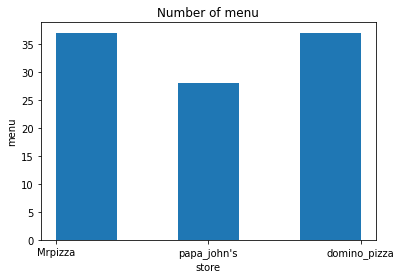

In [10]:
import matplotlib.pyplot as plt

fig =plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(df['store name'], bins=5)
axes1.set_title('Number of menu')
axes1.set_xlabel('store')
axes1.set_ylabel('menu')

pbc_count : Number of pigs, cows, and chickens in one menu


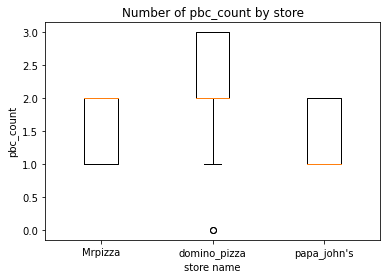

In [11]:
boxplot =plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([df[df['store name'] == 'Mrpizza']['pbc_count'],
              df[df['store name'] == 'domino_pizza']['pbc_count'],
              df[df['store name'] == "papa_john's"]['pbc_count']],
              labels= ['Mrpizza','domino_pizza',"papa_john's"])
axes1.set_title('Number of pbc_count by store')
axes1.set_xlabel('store name')
axes1.set_ylabel('pbc_count')
print('pbc_count : Number of pigs, cows, and chickens in one menu')

Text(0, 0.5, 'Number')

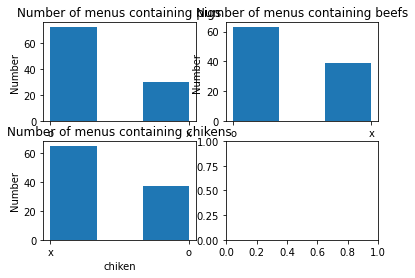

In [12]:
fig =plt.figure()
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

axes1.hist(df['pork'], bins=3)
axes1.set_title('Number of menus containing pigs')
axes1.set_xlabel('pork')
axes1.set_ylabel('Number')
axes2.hist(df['beef'], bins=3)
axes2.set_title('Number of menus containing beefs')
axes2.set_xlabel('beef')
axes2.set_ylabel('Number')
axes3.hist(df['chiken'], bins=3)
axes3.set_title('Number of menus containing chikens')
axes3.set_xlabel('chiken')
axes3.set_ylabel('Number')

Text(0, 0.5, 'Number')

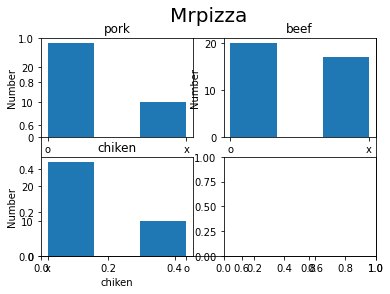

In [13]:
#미스터피자만 뽑아내기
ax= df['store name']=='Mrpizza'
df1=df[ax]

fig =plt.figure()
plt.title('Mrpizza', position=(0.5,1.0+0.05), fontsize=20)
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

axes1.hist(df1['pork'], bins=3)
axes1.set_title('pork')
axes1.set_xlabel('pork')
axes1.set_ylabel('Number')
axes2.hist(df1['beef'], bins=3)
axes2.set_title('beef')
axes2.set_xlabel('beef')
axes2.set_ylabel('Number')
axes3.hist(df1['chiken'], bins=3)
axes3.set_title('chiken')
axes3.set_xlabel('chiken')
axes3.set_ylabel('Number')


Text(0, 0.5, 'Number')

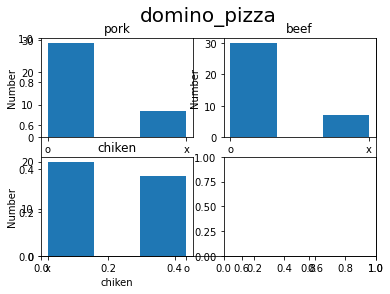

In [14]:
#도미노피자만 뽑아내기
ax2= df['store name']=='domino_pizza'
df2=df[ax2]

fig =plt.figure()
plt.title('domino_pizza', position=(0.5,1.0+0.05), fontsize=20)
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

axes1.hist(df2['pork'], bins=3)
axes1.set_title('pork')
axes1.set_xlabel('pork')
axes1.set_ylabel('Number')
axes2.hist(df2['beef'], bins=3)
axes2.set_title('beef')
axes2.set_xlabel('beef')
axes2.set_ylabel('Number')
axes3.hist(df2['chiken'], bins=3)
axes3.set_title('chiken')
axes3.set_xlabel('chiken')
axes3.set_ylabel('Number')

Text(0, 0.5, 'Number')

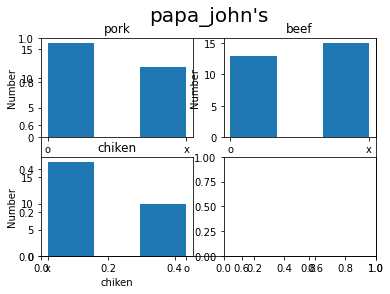

In [15]:
#파파존스만 뽑아내기
ax3= df['store name']=="papa_john's"
df3=df[ax3]

fig =plt.figure()
plt.title("papa_john's", position=(0.5,1.0+0.05), fontsize=20)
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

axes1.hist(df3['pork'], bins=3)
axes1.set_title('pork')
axes1.set_xlabel('pork')
axes1.set_ylabel('Number')
axes2.hist(df3['beef'], bins=3)
axes2.set_title('beef')
axes2.set_xlabel('beef')
axes2.set_ylabel('Number')
axes3.hist(df3['chiken'], bins=3)
axes3.set_title('chiken')
axes3.set_xlabel('chiken')
axes3.set_ylabel('Number')

Text(0, 0.5, 'menu')

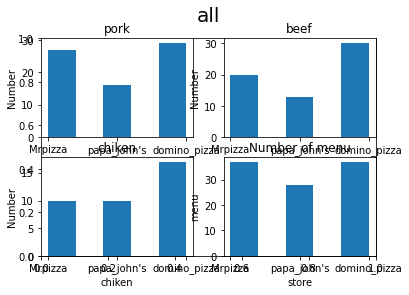

In [16]:
fig =plt.figure()
plt.title("all", position=(0.5,1.0+0.05), fontsize=20)
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

ax4= df['pork']=="o"
df4=df[ax4]
ax5= df['beef']=="o"
df5=df[ax5]
ax6= df['chiken']=="o"
df6=df[ax6]

axes1.hist(df4['store name'], bins=5)
axes1.set_title('pork')
axes1.set_xlabel('pork')
axes1.set_ylabel('Number')

axes2.hist(df5['store name'], bins=5)
axes2.set_title('beef')
axes2.set_xlabel('beef')
axes2.set_ylabel('Number')

axes3.hist(df6['store name'], bins=5)
axes3.set_title('chiken')
axes3.set_xlabel('chiken')
axes3.set_ylabel('Number')

axes4.hist(df['store name'], bins=5)
axes4.set_title('Number of menu')
axes4.set_xlabel('store')
axes4.set_ylabel('menu')